In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

In [2]:
# make dataframe from csv
bank_df = pd.read_csv("bank-full_2.csv")
bank_df.head()

,Unnamed: 0,index,age,job,marital,education,credit_default,balance,housing_loan,personal_loan,contact,duration_sec,campaign,pdays,previous,poutcome,subscription,date,weekday
0,0,0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,2008-05-05,Monday
1,1,1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,2008-05-05,Monday
2,2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,2008-05-05,Monday
3,3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,2008-05-05,Monday
4,4,4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,2008-05-05,Monday


In [3]:
bank_df.isnull().values.any()

False

In [4]:
print(f"Duplicate entries: {bank_df.duplicated().sum()}")

Duplicate entries: 0


In [5]:
bank_df['age'].nunique()

77

In [6]:
bank_list=[]
bank_list=list(bank_df.select_dtypes(include=['object']).columns)
bank_list

['job',
 'marital',
 'education',
 'credit_default',
 'housing_loan',
 'personal_loan',
 'contact',
 'poutcome',
 'subscription',
 'date',
 'weekday']

In [7]:
thing =bank_df[bank_list].nunique()
thing

job                12
marital             3
education           4
credit_default      2
housing_loan        2
personal_loan       2
contact             3
poutcome            4
subscription        2
date              561
weekday             7
dtype: int64

In [8]:
bank_list_binary = ['credit_default','housing_loan','personal_loan','subscription']


In [9]:
# changing data type of binary choices from object to bool
for x in bank_list_binary:
    bank_df[x]=bank_df[x]=="yes"
bank_df[bank_list].nunique()

job                12
marital             3
education           4
credit_default      2
housing_loan        2
personal_loan       2
contact             3
poutcome            4
subscription        2
date              561
weekday             7
dtype: int64

In [10]:
# dropping uneeded columns
bank_df.drop('index',axis=1, inplace=True)

In [11]:
# change date to datetime format
bank_df['date']=pd.to_datetime(bank_df['date'])

# create data
dates = bank_df['date']

# calculate unix datetime
bank_df['date']=(dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

bank_df['date_bins'] = pd.qcut(bank_df['date'], q=10)
bank_df.drop('date', axis=1, inplace= True)

bank_df.dtypes


Unnamed: 0           int64
age                  int64
job                 object
marital             object
education           object
credit_default        bool
balance              int64
housing_loan          bool
personal_loan         bool
contact             object
duration_sec         int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
subscription          bool
weekday             object
date_bins         category
dtype: object

propbaly should run factoranalysis.
or dimensionality reductions via principal componet analysis.

In [12]:
bank_list=[]
bank_list=list(bank_df.select_dtypes(include=['object','category']).columns)
bank_list

['job', 'marital', 'education', 'contact', 'poutcome', 'weekday', 'date_bins']

In [13]:
bank_df[bank_list].nunique()

job          12
marital       3
education     4
contact       3
poutcome      4
weekday       7
date_bins    10
dtype: int64

In [14]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(bank_df[bank_list]))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(bank_list)
encode_df.head()

c:\Users\rab_b\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,"date_bins_(1209945599.999, 1211241600.0]","date_bins_(1211241600.0, 1212624000.0]","date_bins_(1212624000.0, 1215561600.0]","date_bins_(1215561600.0, 1217376000.0]","date_bins_(1217376000.0, 1219363200.0]","date_bins_(1219363200.0, 1227225600.0]","date_bins_(1227225600.0, 1238976000.0]","date_bins_(1238976000.0, 1242000000.0]","date_bins_(1242000000.0, 1249603200.0]","date_bins_(1249603200.0, 1289952000.0]"
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Merge the two DataFrames together and drop the Country column
bank_df=bank_df.merge(encode_df,left_index=True,right_index=True).drop(bank_list,1)


C:\Users\rab_b\AppData\Local\Temp\ipykernel_21192\2310923932.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bank_df=bank_df.merge(encode_df,left_index=True,right_index=True).drop(bank_list,1)


In [16]:
bank_df.drop('Unnamed: 0',axis=1, inplace=True)
bank_df

,age,credit_default,balance,housing_loan,personal_loan,duration_sec,campaign,pdays,previous,subscription,...,"date_bins_(1209945599.999, 1211241600.0]","date_bins_(1211241600.0, 1212624000.0]","date_bins_(1212624000.0, 1215561600.0]","date_bins_(1215561600.0, 1217376000.0]","date_bins_(1217376000.0, 1219363200.0]","date_bins_(1219363200.0, 1227225600.0]","date_bins_(1227225600.0, 1238976000.0]","date_bins_(1238976000.0, 1242000000.0]","date_bins_(1242000000.0, 1249603200.0]","date_bins_(1249603200.0, 1289952000.0]"
0,58,False,2143,True,False,261,1,-1,0,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44,False,29,True,False,151,1,-1,0,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33,False,2,True,True,76,1,-1,0,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47,False,1506,True,False,92,1,-1,0,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,False,1,False,False,198,1,-1,0,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,False,825,False,False,977,3,-1,0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,71,False,1729,False,False,456,2,-1,0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,72,False,5715,False,False,1127,5,184,3,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45209,57,False,668,False,False,508,4,-1,0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
bank_df.dtypes

age                                           int64
credit_default                                 bool
balance                                       int64
housing_loan                                   bool
personal_loan                                  bool
duration_sec                                  int64
campaign                                      int64
pdays                                         int64
previous                                      int64
subscription                                   bool
job_admin.                                  float64
job_blue-collar                             float64
job_entrepreneur                            float64
job_housemaid                               float64
job_management                              float64
job_retired                                 float64
job_self-employed                           float64
job_services                                float64
job_student                                 float64
job_technici

In [18]:
# set up data x and y
y = bank_df.subscription
X = bank_df.drop(columns="subscription")

In [19]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_scaled = X_scaler.transform(X)

In [21]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=100)

# Train the model
log_classifier.fit(X_train_scaled,y_train)

# Evaluate the model
y_pred_test = log_classifier.predict(X_test_scaled)
y_pred_train = log_classifier.predict(X_train_scaled)

print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, y_pred_train))
print('Precision:', precision_score(y_train, y_pred_train))
print('Recall:', recall_score(y_train, y_pred_train))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_test)) 
print('Precision:', precision_score(y_test, y_pred_test)) 
print('Recall:', recall_score(y_test, y_pred_test)) 

Training set metrics:
Accuracy: 0.90568597381149
Precision: 0.6644351464435146
Recall: 0.3985943775100402
Test set metrics:
Accuracy: 0.9065734760683004
Precision: 0.6531365313653137
Recall: 0.4068965517241379


In [22]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=50, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# evaluate training
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')

# Evaluate the model
y_pred_test = rf_model.predict(X_test_scaled)
y_pred_train = rf_model.predict(X_train_scaled)


print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, y_pred_train))
print('Precision:', precision_score(y_train, y_pred_train))
print('Recall:', recall_score(y_train, y_pred_train))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_test)) 
print('Precision:', precision_score(y_test, y_pred_test)) 
print('Recall:', recall_score(y_test, y_pred_test)) 

Training Score: 0.9997640674767017
Training set metrics:
Accuracy: 0.9997640674767017
Precision: 1.0
Recall: 0.9979919678714859
Test set metrics:
Accuracy: 0.9056887551977351
Precision: 0.639766081871345
Recall: 0.4191570881226054


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=1, n_estimators=25).fit(X_train_scaled, y_train)
# Evaluate the model
y_pred_test = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)

# print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, y_pred_train))
print('Precision:', precision_score(y_train, y_pred_train))
print('Recall:', recall_score(y_train, y_pred_train))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_test)) 
print('Precision:', precision_score(y_test, y_pred_test)) 
print('Recall:', recall_score(y_test, y_pred_test)) 

Training set metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Test set metrics:
Accuracy: 0.896045297708573
Precision: 0.5742009132420092
Recall: 0.3854406130268199


[9.26546751e-02 1.55987886e-03 9.96323410e-02 2.15882796e-02
 9.85682426e-03 2.75494028e-01 3.93529231e-02 3.33811047e-02
 2.00212774e-02 9.58083574e-03 8.99096734e-03 3.61113451e-03
 3.25106840e-03 1.08142092e-02 5.49352325e-03 4.08670028e-03
 6.44897473e-03 4.29850330e-03 1.09660463e-02 4.48610231e-03
 1.45838270e-03 7.83249619e-03 1.12585075e-02 9.84480745e-03
 7.31364206e-03 1.22488117e-02 1.13354669e-02 5.44421149e-03
 9.18196578e-03 4.70381076e-03 7.68978408e-03 7.22615192e-03
 4.75189975e-03 4.23238750e-02 5.79625515e-03 1.18854958e-02
 1.26494545e-02 2.72430420e-04 4.26178407e-04 1.27626060e-02
 1.27176344e-02 1.27228173e-02 2.22210692e-03 1.81054016e-03
 3.79433146e-03 4.82234063e-03 4.74887037e-03 8.34761758e-03
 8.64634264e-03 9.55252235e-03 1.09196265e-02 6.77196189e-02]


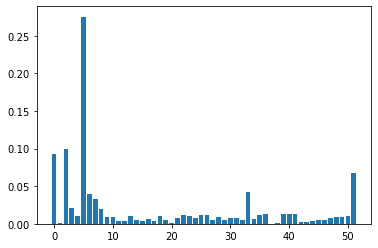

In [23]:
features = rf_model.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [24]:
col_sorted_by_importance=rf_model.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X_scaled.columns[col_sorted_by_importance],
    'imps':rf_model.feature_importances_[col_sorted_by_importance]
})

import plotly_express as px
import plotly.offline as po
px.bar(feat_imp.sort_values(['imps'], ascending=False)[:25], x='cols', y='imps', labels={'cols':'column', 'imps':'feature importance'})

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
def PermImportance(X, y, clf, metric, num_iterations=100):
    # https://towardsdatascience.com/explain-your-machine-learning-with-feature-importance-774cd72abe
    '''
    Calculates the permutation importance of features in a dataset.
    Inputs:
    X: dataframe with all the features
    y: array-like sequence of labels
    clf: sklearn classifier, already trained on training data
    metric: sklearn metric, such as accuracy_score, precision_score or recall_score
    num_iterations: no. of repetitive runs of the permutation
    Outputs:
    baseline: the baseline metric without any of the columns permutated
    scores: differences in baseline metric caused by permutation of each feature, dict in the format {feature:[diffs]}
    '''
    bar=progressbar.ProgressBar(max_value=len(X.columns))
    baseline_metric=metric(y, clf.predict(X))
    scores={c:[] for c in X.columns}
    for c in X.columns:
        X1=X.copy(deep=True)
        for _ in range(num_iterations):
            temp=X1[c].tolist()
            random.shuffle(temp)
            X1[c]=temp
            score=metric(y, clf.predict(X1))
            scores[c].append(baseline_metric-score)
        bar.update(X.columns.tolist().index(c))
    return baseline_metric, scores

In [ ]:
import time
import progressbar
import random
baseline, scores= PermImportance(X_scaled,y,rf_model,recall_score,num_iterations=10)

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packag

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

  7% (4 of 52) |#                        | Elapsed Time: 0:00:15 ETA:   0:03:06C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassi

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

 17% (9 of 52) |####                     | Elapsed Time: 0:00:34 ETA:   0:02:48C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassi

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

 26% (14 of 52) |######                  | Elapsed Time: 0:00:54 ETA:   0:02:26C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassi

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

 36% (19 of 52) |########                | Elapsed Time: 0:01:13 ETA:   0:02:07C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassi

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

 46% (24 of 52) |###########             | Elapsed Time: 0:01:32 ETA:   0:01:48C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassi

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

 55% (29 of 52) |#############          

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packag

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packag

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packag

 92% (48 of 52) |######################  | Elapsed Time: 0:03:04 ETA:   0:00:15C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\rab_b\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassi

In [ ]:
percent_changes={c:[] for c in X_scaled.columns}
for c in scores:
    for i in range(len(scores[c])):
        percent_changes[c].append(scores[c][i]/baseline*100)

In [ ]:
px.bar(
    pd.DataFrame.from_dict(percent_changes).melt().groupby(['variable']).mean().reset_index().sort_values(['value'], ascending=False)[:60], 
    x='variable', 
    y='value', 
    labels={
        'variable':'column', 
        'value':'% change in recall'
        }
       )